# Probabilità e direzione: lo stop loss ed il profit target

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ffn
%matplotlib inline

pd.options.display.max_rows = 99999

In [2]:
dataset = ffn.get('aapl:Open,aapl:High,aapl:Low,aapl:Close', start='2007-01-01', end='2019-10-06')
dataset.columns = ["open","high","low","close"]
dataset.head()

,open,high,low,close
Date,,,,
2007-01-03,12.327143,12.368571,11.700000,11.971429
2007-01-04,12.007143,12.278571,11.974286,12.237143
2007-01-05,12.252857,12.314285,12.057143,12.150000
2007-01-08,12.280000,12.361428,12.182858,12.210000
2007-01-09,12.350000,13.282857,12.164286,13.224286


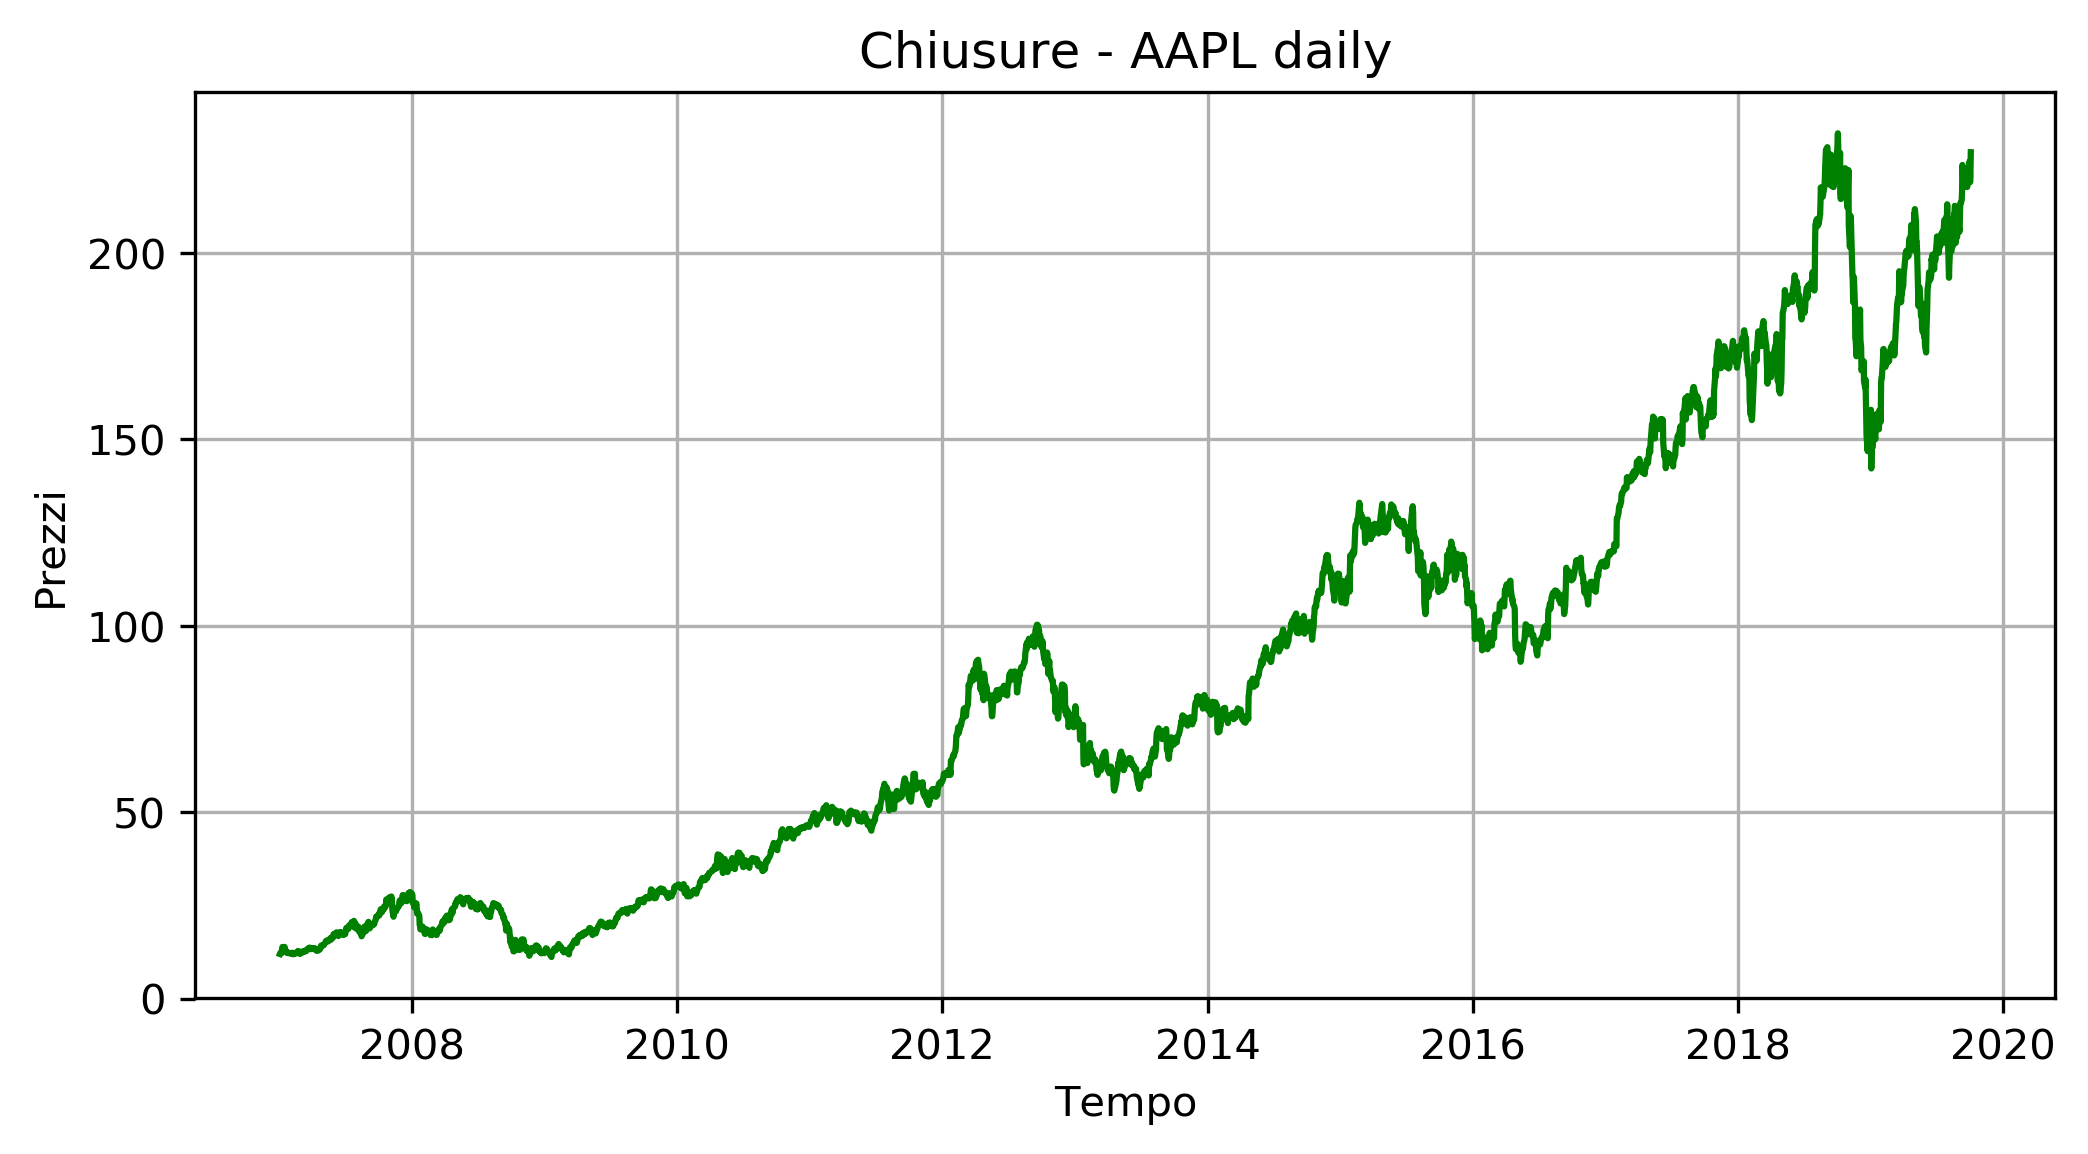

In [3]:
plt.figure(figsize=(8,4), dpi=300)
plt.plot(dataset.close, color='green')
plt.xlabel("Tempo")
plt.ylabel("Prezzi")
plt.title("Chiusure - AAPL daily")
plt.grid(True)
plt.show()

In [38]:
dataset.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,open,high,low,close
count,3212.000000,3212.000000,3212.000000,3212.000000
mean,86.257981,87.057030,85.422807,86.260109
std,58.309467,58.797357,57.859472,58.337001
min,11.341429,11.714286,11.171429,11.171429
1%,12.281585,12.489985,12.122357,12.249671
5%,13.788714,14.197429,13.462143,13.848786
10%,18.413714,18.717571,17.976285,18.326714
25%,31.984285,32.168571,31.460714,32.007143
50%,77.117142,77.998573,76.441429,77.013573
75%,120.832502,121.674997,119.839998,120.657499


In [5]:
dataset['AvgPrice'] = round(dataset.mean(axis=1),2)
dataset['Range'] = round(dataset.high - dataset.low,2)
dataset['Body'] = abs(dataset.open - dataset.close)
dataset['CO'] = round(dataset.close - dataset.open,2)
dataset['OL'] = round((dataset.open - dataset.low),2)
dataset['HO'] = round((dataset.high - dataset.open),2)
dataset['CL'] = round((dataset.close - dataset.low),2)
dataset['HC'] = round((dataset.high - dataset.close),2)
dataset['BodyRangePerc'] = round(dataset.Body/dataset.Range * 100,2)
# Percentuale della barra (all'interno del range) dove si attesta il close
dataset['ClosePerc'] = round((dataset.close - dataset.low) * 100 / dataset.Range,2)
dataset['Color'] = list(map(lambda x: "black" if x <= 0 else "white", dataset.CO))

dataset.head(10)

,open,high,low,close,AvgPrice,Range,Body,CO,OL,HO,CL,HC,BodyRangePerc,ClosePerc,Color
Date,,,,,,,,,,,,,,,
2007-01-03,12.327143,12.368571,11.700000,11.971429,12.09,0.67,0.355714,-0.36,0.63,0.04,0.27,0.40,53.09,40.51,black
2007-01-04,12.007143,12.278571,11.974286,12.237143,12.12,0.30,0.230000,0.23,0.03,0.27,0.26,0.04,76.67,87.62,white
2007-01-05,12.252857,12.314285,12.057143,12.150000,12.19,0.26,0.102858,-0.10,0.20,0.06,0.09,0.16,39.56,35.71,black
2007-01-08,12.280000,12.361428,12.182858,12.210000,12.26,0.18,0.070000,-0.07,0.10,0.08,0.03,0.15,38.89,15.08,black
2007-01-09,12.350000,13.282857,12.164286,13.224286,12.76,1.12,0.874286,0.87,0.19,0.93,1.06,0.06,78.06,94.64,white
2007-01-10,13.535714,13.971429,13.350000,13.857142,13.68,0.62,0.321428,0.32,0.19,0.44,0.51,0.11,51.84,81.80,white
2007-01-11,13.705714,13.825714,13.585714,13.685715,13.70,0.24,0.020000,-0.02,0.12,0.12,0.10,0.14,8.33,41.67,black
2007-01-12,13.512857,13.580000,13.318571,13.517143,13.48,0.26,0.004286,0.00,0.19,0.07,0.20,0.06,1.65,76.37,black
2007-01-16,13.668571,13.892858,13.635715,13.871428,13.77,0.26,0.202857,0.20,0.03,0.22,0.24,0.02,78.02,90.66,white


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


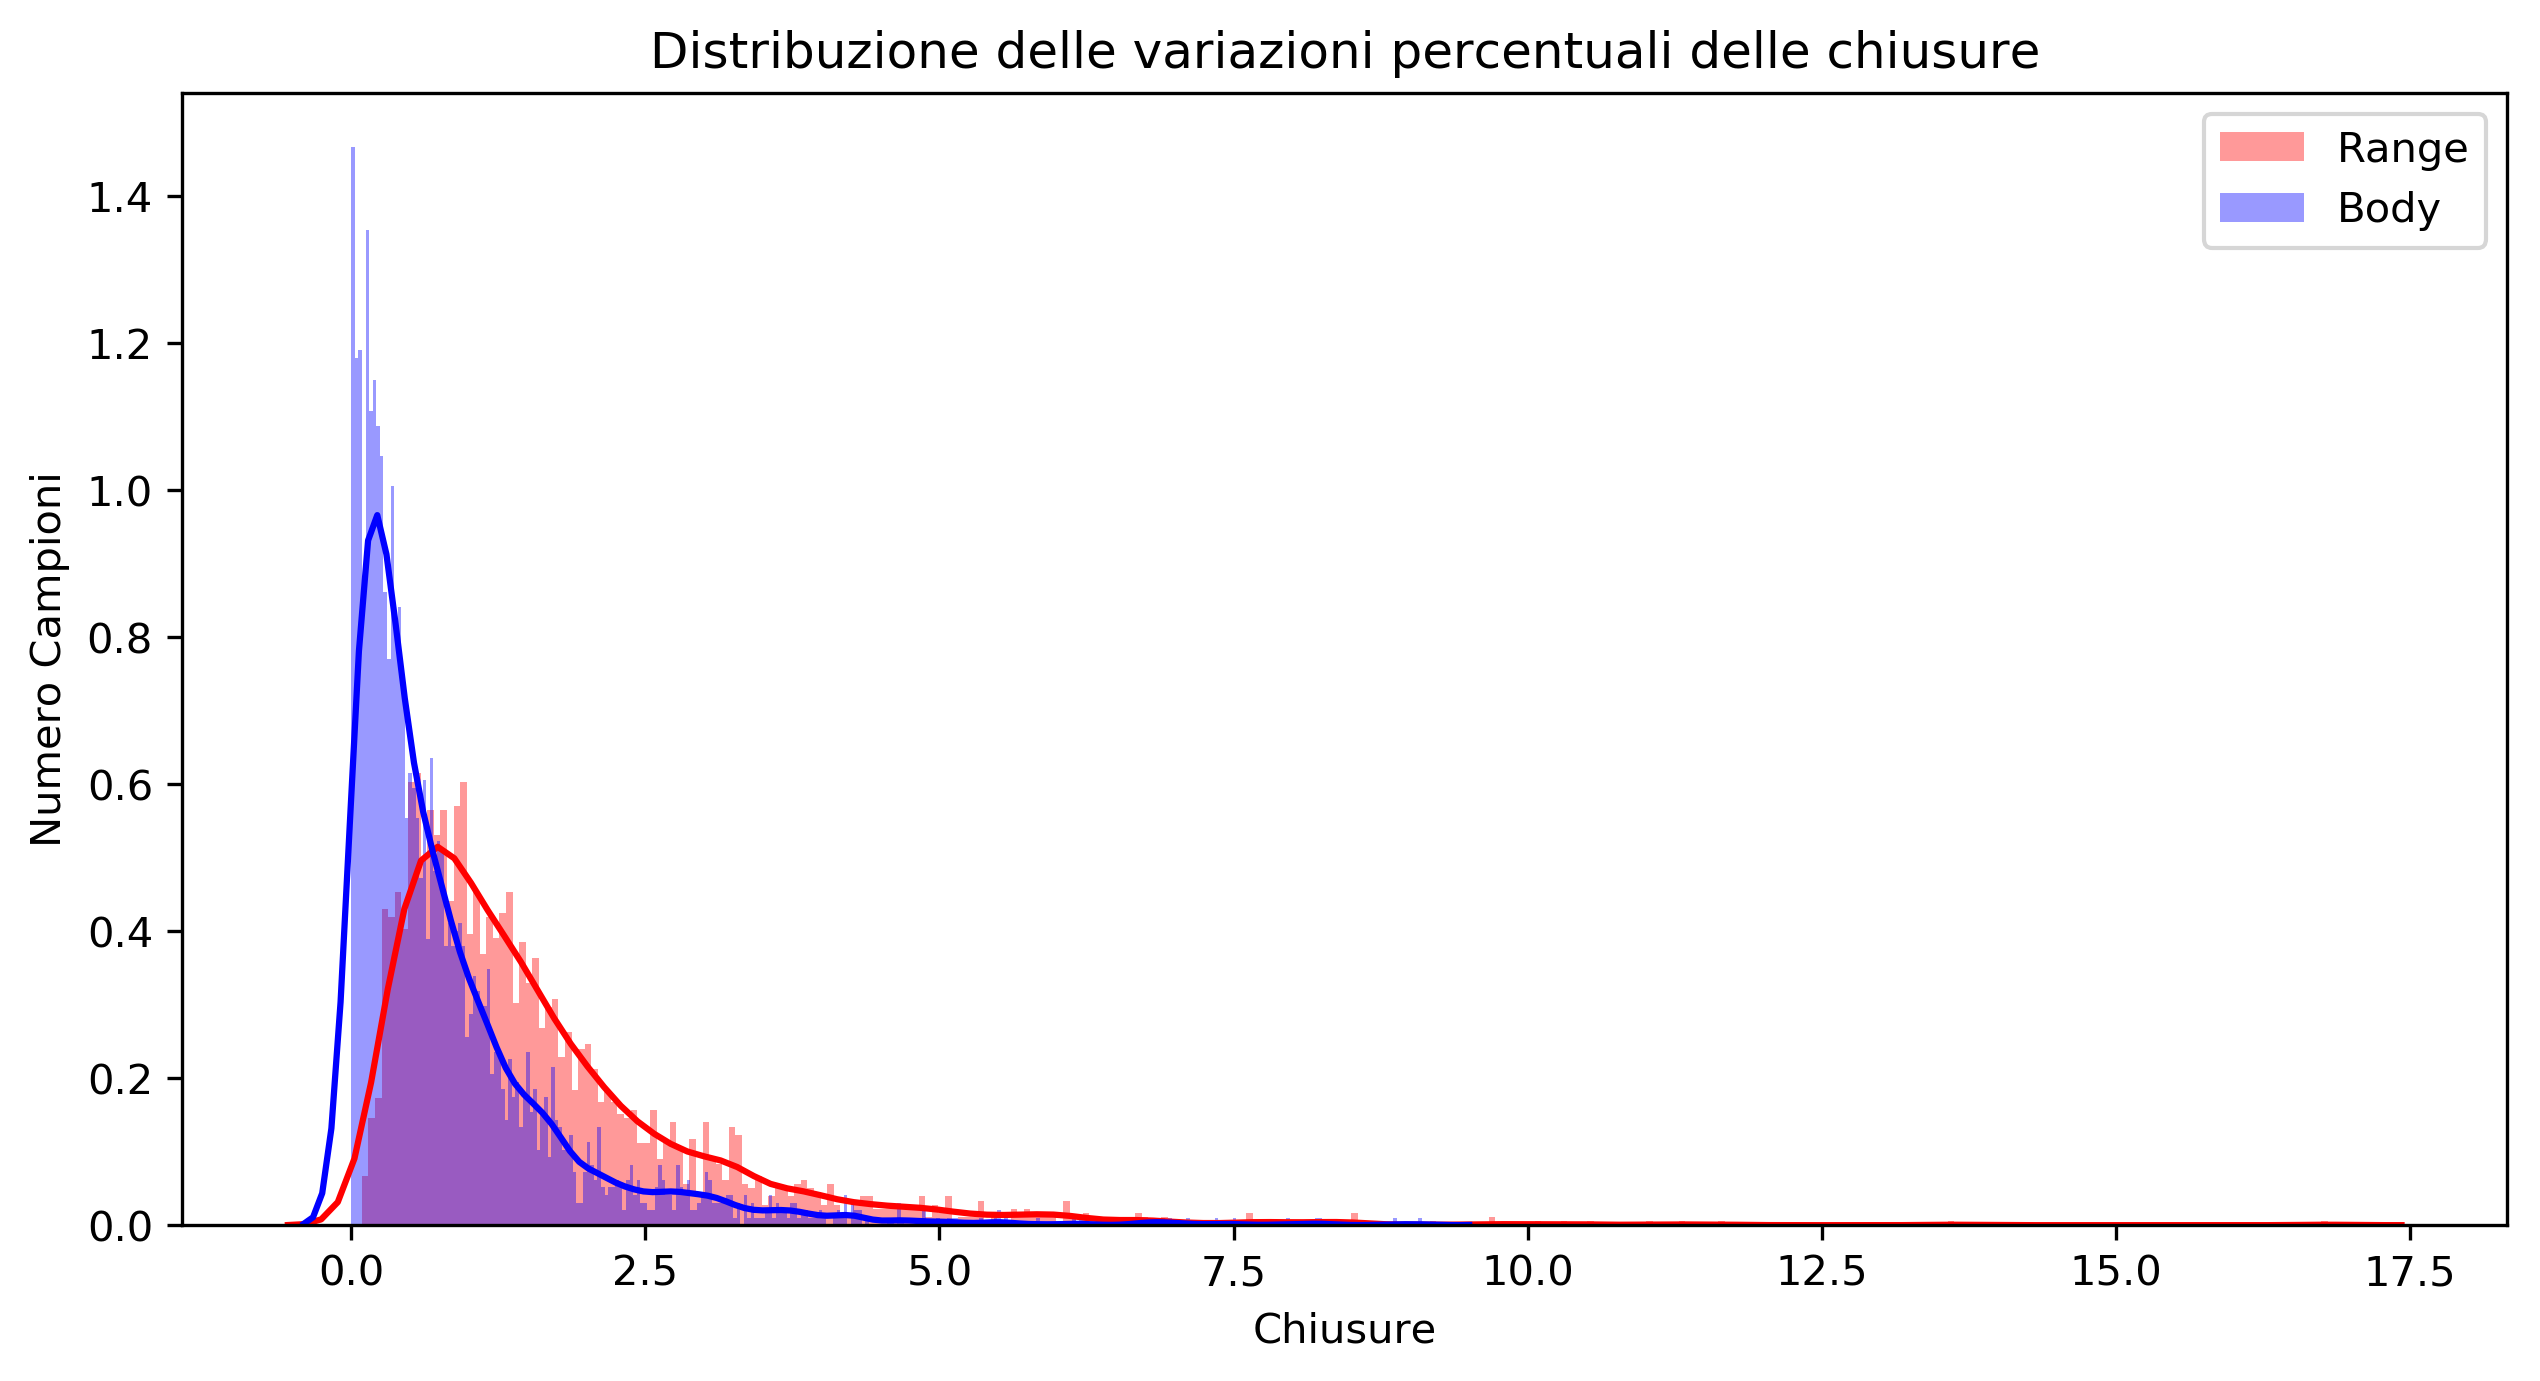

In [6]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(dataset.Range, bins=300, color="red", label='Range')
sns.distplot(dataset.Body, bins=300, color="blue", label='Body')
plt.title("Distribuzione delle variazioni percentuali delle chiusure")
plt.xlabel("Chiusure")
plt.ylabel("Numero Campioni")
plt.legend()
plt.show()

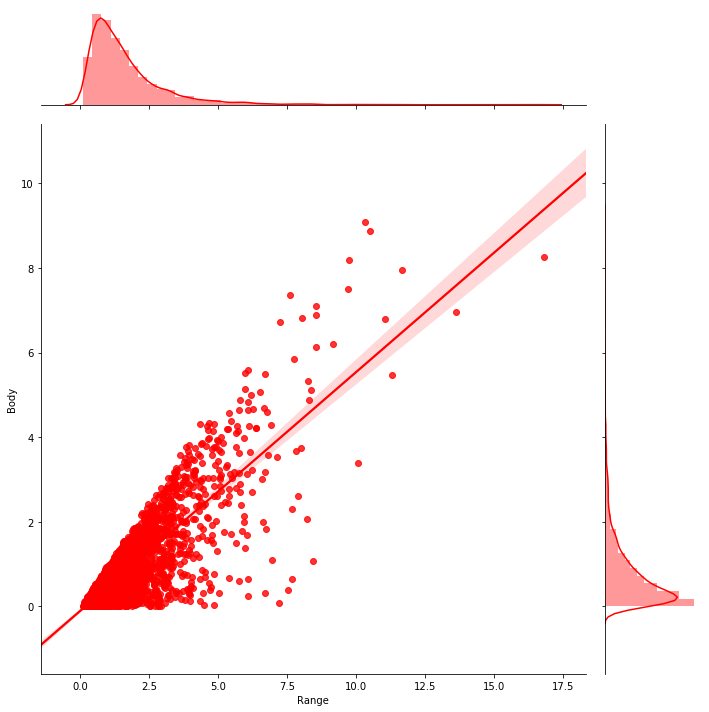

In [8]:
sns.jointplot(x='Range', y='Body', height=10, data=dataset, color='r', kind='reg');

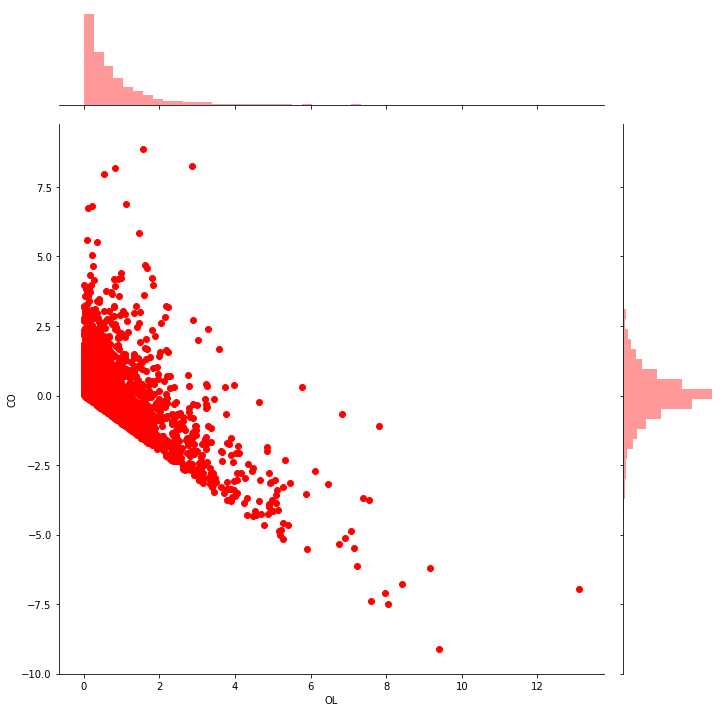

In [12]:
sns.jointplot(x='OL', y='CO', height=10, data = dataset, kind='scatter', color='r');

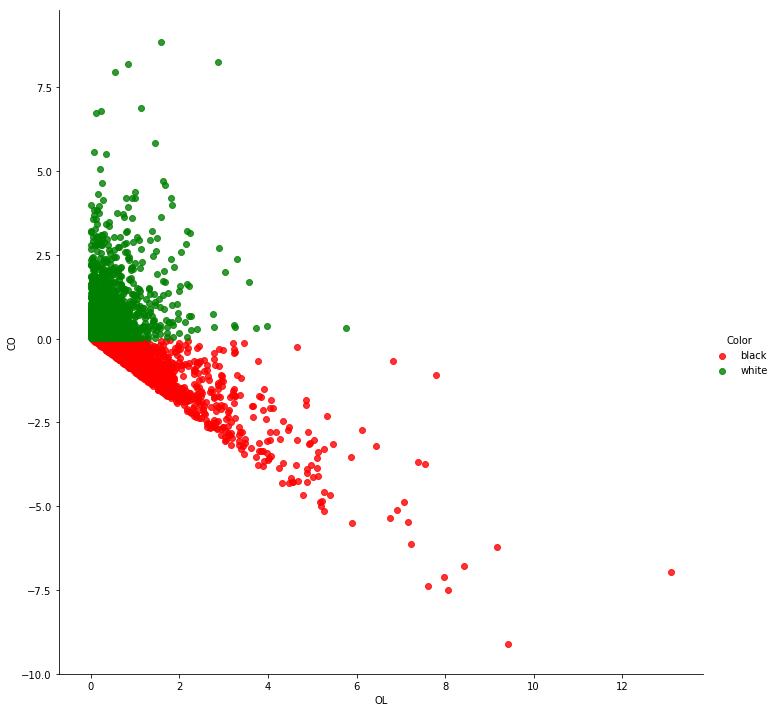

In [11]:
sns.lmplot(x = "OL", y = "CO", height = 10, hue = "Color", data = dataset, fit_reg = False, 
           palette = dict(white = "green", black = "red"));

In [16]:
print("Positive:",dataset[dataset['CO'] > 0]['OL'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())
print("")
print("StopLoss long tarato sul 95esimo quantile della distribuzione:",
      round(-dataset[dataset['CO'] > 0]['OL'].quantile(.95),2))
print("StopLoss long tarato sul 99esimo quantile della distribuzione:",
      round(-dataset[dataset['CO'] > 0]['OL'].quantile(.99),2))

Positive: count    1634.000000
mean        0.389798
std         0.487826
min         0.000000
25%         0.090000
50%         0.230000
75%         0.520000
80%         0.610000
90%         0.927000
95%         1.323500
99%         2.216700
max         5.770000
Name: OL, dtype: float64

StopLoss long tarato sul 95esimo quantile della distribuzione: -1.32
StopLoss long tarato sul 99esimo quantile della distribuzione: -2.22


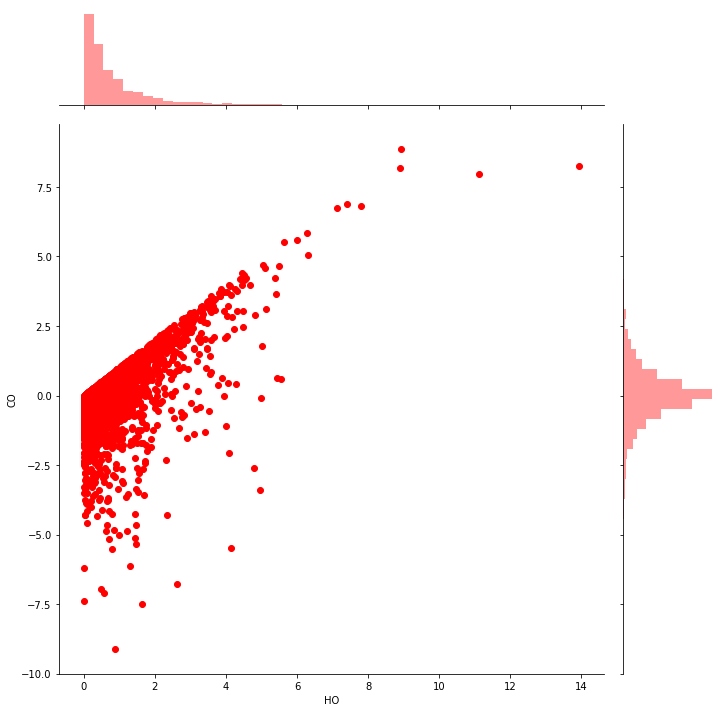

In [25]:
sns.jointplot(x='HO', y='CO', height=10, data=dataset, kind='scatter', color='r');

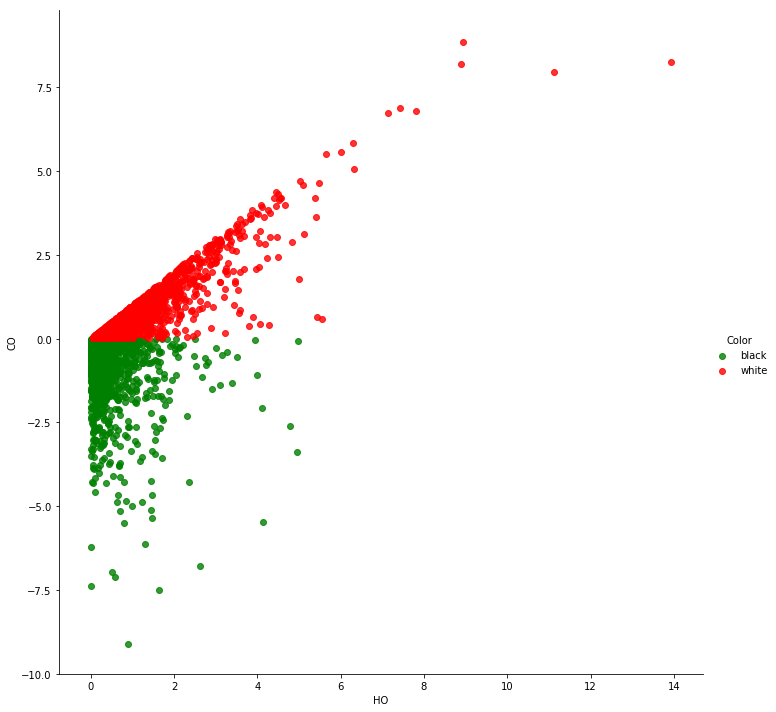

In [23]:
sns.lmplot(x = "HO", y = "CO", height = 10, hue = "Color", data = dataset, fit_reg = False, 
           palette = dict(white = "red", black = "green"));

In [24]:
print("Negative:",dataset[dataset['CO'] < 0]['HO'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())
print("")
print("StopLoss short tarato sul 95esimo quantile della distribuzione:",
      round(-dataset[dataset['CO'] < 0]['HO'].quantile(.95),2))
print("StopLoss short tarato sul 99esimo quantile della distribuzione:",
      round(-dataset[dataset['CO'] < 0]['HO'].quantile(.99),2))

Negative: count    1560.000000
mean        0.399596
std         0.541121
min         0.000000
25%         0.090000
50%         0.230000
75%         0.500000
80%         0.580000
90%         0.970000
95%         1.430500
99%         2.758200
max         4.980000
Name: HO, dtype: float64

StopLoss short tarato sul 95esimo quantile della distribuzione: -1.43
StopLoss short tarato sul 99esimo quantile della distribuzione: -2.76


# Quadro di insieme

Decidiamo dunque di utilizzare uno stoploss, per operazioni LONG, proporzionale al 95esimo quantile della distribuzione di OpenLow per CloseOpen positivi e, per operazioni SHORT, proporzionale al 95esimo quantile della distribuzione di HighOpen per CloseOpen negativi:

In [26]:
print("Positive:",dataset[dataset['CO'] > 0]['OL'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())
print("")
print("Negative:",dataset[dataset['CO'] < 0]['HO'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())
print("")
print("StopLoss long tarato sul 95esimo quantile della distribuzione:",
      round(-dataset[dataset['CO'] > 0]['OL'].quantile(.95),2))
print("StopLoss short tarato sul 95esimo quantile della distribuzione:",
      -dataset[dataset['CO'] < 0]['HO'].quantile(.95))
print("")
print("StopLoss long tarato sul 99esimo quantile della distribuzione:",
      round(-dataset[dataset['CO'] > 0]['OL'].quantile(.99),2))
print("StopLoss short tarato sul 99esimo quantile della distribuzione:",
      -dataset[dataset['CO'] < 0]['HO'].quantile(.99))

Positive: count    1634.000000
mean        0.389798
std         0.487826
min         0.000000
25%         0.090000
50%         0.230000
75%         0.520000
80%         0.610000
90%         0.927000
95%         1.323500
99%         2.216700
max         5.770000
Name: OL, dtype: float64

Negative: count    1560.000000
mean        0.399596
std         0.541121
min         0.000000
25%         0.090000
50%         0.230000
75%         0.500000
80%         0.580000
90%         0.970000
95%         1.430500
99%         2.758200
max         4.980000
Name: HO, dtype: float64

StopLoss long tarato sul 95esimo quantile della distribuzione: -1.32
StopLoss short tarato sul 95esimo quantile della distribuzione: -1.4304999999999994

StopLoss long tarato sul 99esimo quantile della distribuzione: -2.22
StopLoss short tarato sul 99esimo quantile della distribuzione: -2.7582000000000013
